In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import neattext.functions as nfx
    

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

<Axes: xlabel='Label', ylabel='count'>

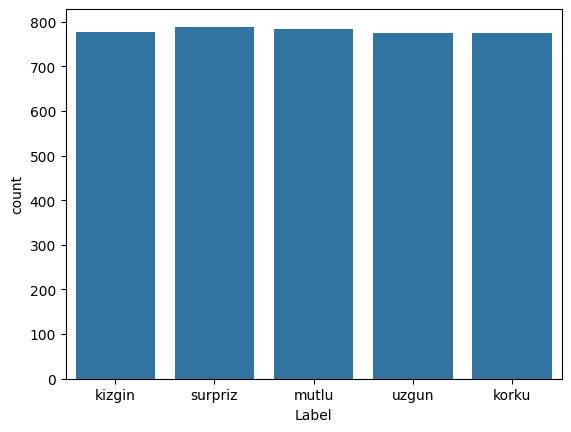

In [3]:
df = pd.read_csv("data/dataset.csv", encoding='latin-1') 
sns.countplot(x='Label', data=df)

Data Cleaning

In [4]:
dir(nfx)
# user Handles
df['Clean_Text'] = df['Sentence'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df

,Unnamed: 0,Sentence,Label,Clean_Text
0,0,Allah aþkýna bi fýrça neden 250 tl neden yani ...,kizgin,Allah aþkýna bi fýrça neden 250 tl neden yani ...
1,1,Muavin bir þey içip içmediðimi sormak için ben...,surpriz,Muavin bir þey içip içmediðimi sormak için ben...
2,2,Herkese güzel günler öpüyorum sizler tivitýr a...,mutlu,Herkese güzel günler öpüyorum sizler tivitýr a...
3,3,Ya þu sevgililerin birbirine þifre verme olayý...,kizgin,Ya þu sevgililerin birbirine þifre verme olayý...
4,4,Almanya'da 'yok artýk' dedirten olay! Nereye p...,surpriz,Almanya'da 'yok artýk' dedirten olay! Nereye p...
...,...,...,...,...
3895,3895,Onu görünce ben de ürktüm bir baþta sonra yeni...,korku,Onu görünce ben de ürktüm bir baþta sonra yeni...
3896,3896,Gece sabaha kadar 50 tane kabus gördüm nasýl b...,korku,Gece sabaha kadar 50 tane kabus gördüm nasýl b...
3897,3897,"Sustum senden sonra, sessize aldým dilimi. Ne ...",korku,"Sustum senden sonra, sessize aldým dilimi. Ne ..."
3898,3898,mutsuzum çünkü ders çalýþamýyorum odaklanamýyo...,uzgun,mutsuzum çünkü ders çalýþamýyorum odaklanamýyo...


Features and Labels

In [5]:
Xfeatures=df['Sentence']
ylabels=df['Label']
#train test split
x_train,x_test,y_train,y_test=train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=41)

Building Pipeline

In [6]:
from sklearn.pipeline import Pipeline
# a simple Logistic Regression Pipeline
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

Train and Fit data in model

In [7]:
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.9705128205128205

Save the model with pipeline

In [8]:
import joblib
pipeline_file=open('emotion_classifier.pkl',"wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()